<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Noisy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Adding white noise channels or all-zeros channels to MNIST:
# add 784 white noise / zeros dimensions to the existing 784 dimensions

from tensorflow.keras.datasets import mnist 
import numpy as np 

(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 

train_images_with_noise_channels = np.concatenate( 
    [train_images, np.random.random((len(train_images), 784))], axis=1 
)

train_images_with_zeros_channels = np.concatenate( 
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Training the model on the same MNIST data with noise/zero channels: 

from tensorflow import keras 
from tensorflow.keras import layers 

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  model.compile(
      optimizer='rmsprop',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )
  return model 

model = get_model() 
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10, 
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit( 
    train_images_with_zeros_channels, train_labels,
    epochs=10, 
    batch_size=128, 
    validation_split=0.2
)


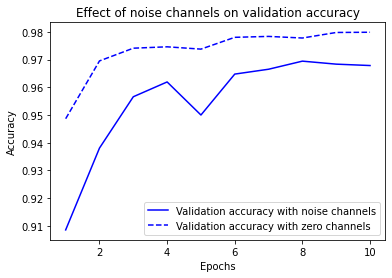

In [7]:
# Plotting a validation accuracy comparison: 

import matplotlib.pyplot as plt 

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zero channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# The spurious correlations generated by the presence of noise degrade the accuracy of the model  
# Noisy features lead to overfitting. 
# A good practice is to do feature selection befor training the model:
# compute some usefulness score for each feature available, which measure how informative the feature is 
# with respect to the tusk;
# keep features that are above some threshold. 
# This would filter out some noise. 

In [ ]:
# Fitting a MNIST model with randomly shuffled labels:
# deep learning models can be trained to fit anything, given enogh representational power. 

(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) 

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128, 
          validation_split=0.2) 

# Note that it will take some time to fit the model with this number of epochs
